In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

cld = pd.read_csv('heart-data/processed.cleveland.data',names=["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
                                                          "thalach", "exang", "oldpeak", "slope", "ca", "thal",
                                                          "num"],header=None)

hgy = pd.read_csv('heart-data/processed.hungarian.data',names=["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
                                                          "thalach", "exang", "oldpeak", "slope", "ca", "thal",
                                                          "num"],header=None)

swit = pd.read_csv('heart-data/processed.switzerland.data',names=["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
                                                          "thalach", "exang", "oldpeak", "slope", "ca", "thal",
                                                          "num"],header=None)

va = pd.read_csv('heart-data/processed.va.data',names=["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
                                                          "thalach", "exang", "oldpeak", "slope", "ca", "thal",
                                                          "num"],header=None)

In [2]:
data_list = [cld, hgy, swit, va]

heart_df = pd.concat(data_list)
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54.0,0.0,4.0,127,333,1,1,154,0,0,?,?,?,1
196,62.0,1.0,1.0,?,139,0,1,?,?,?,?,?,?,0
197,55.0,1.0,4.0,122,223,1,1,100,0,0,?,?,6,2
198,58.0,1.0,4.0,?,385,1,2,?,?,?,?,?,?,0


In [3]:
heart_df = heart_df.replace('?', np.nan)

In [4]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  861 non-null    object 
 4   chol      890 non-null    object 
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalach   865 non-null    object 
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    object 
 10  slope     611 non-null    object 
 11  ca        309 non-null    object 
 12  thal      434 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(3), int64(1), object(10)
memory usage: 107.8+ KB


In [5]:
heart_corr = heart_df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
heart_corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.019222,0.009347,0.060299,0.005119,0.045993,0.083869,0.041766,0.040089,-0.032571,-0.055995,-0.083840,0.010774,-0.017723
sex,-0.019222,1.000000,0.182349,-0.104392,-0.196995,-0.060842,-0.008731,-0.132774,-0.139309,-0.200331,-0.069210,0.073160,-0.019171,-0.274826
cp,0.009347,0.182349,1.000000,-0.034782,-0.124493,0.076450,0.114342,-0.067761,-0.106248,-0.235665,-0.242332,-0.072726,-0.147412,-0.397380
trestbps,0.060299,-0.104392,-0.034782,1.000000,0.592080,0.186611,0.588964,0.834296,0.831812,0.520489,0.170669,-0.469925,-0.135702,0.088042
chol,0.005119,-0.196995,-0.124493,0.592080,1.000000,0.145554,0.531330,0.595106,0.544251,0.462742,0.166980,-0.507345,-0.072477,0.230669
fbs,0.045993,-0.060842,0.076450,0.186611,0.145554,1.000000,0.111002,0.129784,0.169935,-0.138602,-0.232051,-0.329418,-0.167809,-0.019758
restecg,0.083869,-0.008731,0.114342,0.588964,0.531330,0.111002,1.000000,0.595059,0.598111,0.061164,-0.040691,-0.486991,-0.167424,-0.050387
thalach,0.041766,-0.132774,-0.067761,0.834296,0.595106,0.129784,0.595059,1.000000,0.858988,0.571804,0.217685,-0.451111,-0.080387,0.152099
exang,0.040089,-0.139309,-0.106248,0.831812,0.544251,0.169935,0.598111,0.858988,1.000000,0.529588,0.276167,-0.416694,-0.058792,0.187385
oldpeak,-0.032571,-0.200331,-0.235665,0.520489,0.462742,-0.138602,0.061164,0.571804,0.529588,1.000000,0.525618,-0.162842,0.126296,0.335603


<AxesSubplot:>

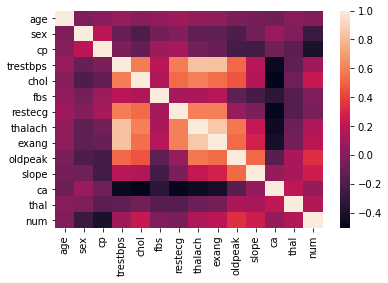

In [6]:
sns.heatmap(heart_corr)

In [7]:
data = heart_df.drop(columns='num')
target = heart_df['num']

In [8]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline


### Mutual Information

In [19]:
preprocessor = make_pipeline(KNNImputer(n_neighbors=3), OrdinalEncoder(handle_unknown='ignore'), 
                      StandardScaler())

data_sc = preprocessor.fit_transform(data)

In [23]:
from sklearn.feature_selection import mutual_info_classif as MIC
mi_scores = MIC(data_sc, target)
print(mi_score)

[0.04938571 0.02802494 0.12284848 0.00148155 0.09556952 0.02670791
 0.         0.07255847 0.08913192 0.14695792 0.0476197  0.11390234
 0.05511175]


In [37]:
from sklearn.model_selection import train_test_split


mi_score_selected_index = np.where(mi_scores >0.05)[0]
data_mi = data_sc[:,mi_score_selected_index]

X_train, X_test, y_train, y_test = train_test_split(data_mi, target,test_size=0.2 ,random_state=42)

In [38]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
prediction = model.predict(X_test)

In [40]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, prediction))
confusion_matrix(y_test, prediction)

              precision    recall  f1-score   support

           0       0.72      0.79      0.75        75
           1       0.41      0.43      0.42        54
           2       0.23      0.24      0.24        25
           3       0.20      0.12      0.15        26
           4       0.00      0.00      0.00         4

    accuracy                           0.49       184
   macro avg       0.31      0.31      0.31       184
weighted avg       0.47      0.49      0.48       184



array([[59, 13,  2,  1,  0],
       [14, 23,  9,  7,  1],
       [ 3, 10,  6,  3,  3],
       [ 6,  9,  7,  3,  1],
       [ 0,  1,  2,  1,  0]])

### Cross Validation

In [41]:
from sklearn.model_selection import cross_validate

cv = cross_validate(model, data_mi, target, cv=5, n_jobs=-1)
cv

{'fit_time': array([0.00760198, 0.00833297, 0.00787282, 0.00977421, 0.00536108]),
 'score_time': array([0.00128508, 0.00133991, 0.00144005, 0.00166011, 0.00078487]),
 'test_score': array([0.47826087, 0.42934783, 0.47826087, 0.375     , 0.33152174])}